In [476]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import imageio

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,20)

In [477]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [478]:
hf.keys()

KeysView(<HDF5 file "gammaray_lab4.h5" (mode r)>)

In [479]:
data = np.array(hf.get('data'))

In [480]:
data_table = pd.DataFrame(data=None, index=None, columns = ['seconds', 'solar_phase(deg)', 'earth_long(deg)', 'particle_counts'])
data_table['seconds'] =  data[0,:] - data[0,:].min()
data_table['solar_phase(deg)'] = data[1,:]
data_table['earth_long(deg)'] = data[2,:]
data_table['particle_counts'] = data[3,:]
data_table

## Counts are dependent on earth longitude 
## Find average by taking the PMF function

,seconds,solar_phase(deg),earth_long(deg),particle_counts
0,0.0,315.000000,45.000000,10.0
1,0.1,315.007112,45.006667,8.0
2,0.2,315.014225,45.013333,7.0
3,0.3,315.021337,45.020000,11.0
4,0.4,315.028449,45.026667,8.0
5,0.5,315.035561,45.033333,11.0
6,0.6,315.042674,45.040000,5.0
7,0.7,315.049786,45.046667,10.0
8,0.8,315.056898,45.053333,9.0
9,0.9,315.064011,45.060000,8.0


Text(0,0.5,'Earth Longitude (deg)')

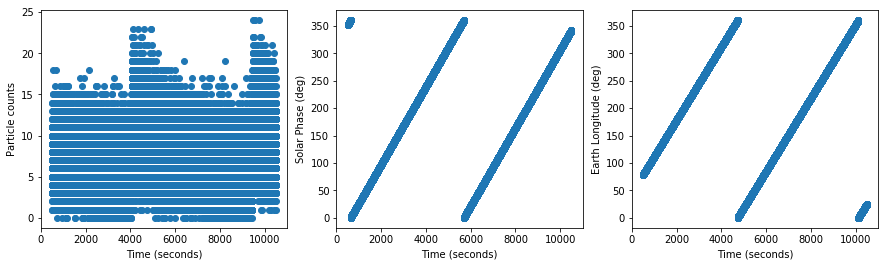

In [481]:
start = 5000; total_points = 100000

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
test_points = data_table[start-1:start-1+total_points]
ax1.scatter(test_points['seconds'], test_points['particle_counts'])
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel("Particle counts")

ax2.scatter(test_points['seconds'], test_points['solar_phase(deg)'])
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel("Solar Phase (deg)")

ax3.scatter(test_points['seconds'], test_points['earth_long(deg)'])
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel("Earth Longitude (deg)")

Text(0,0.5,'Earth Longitude (deg)')

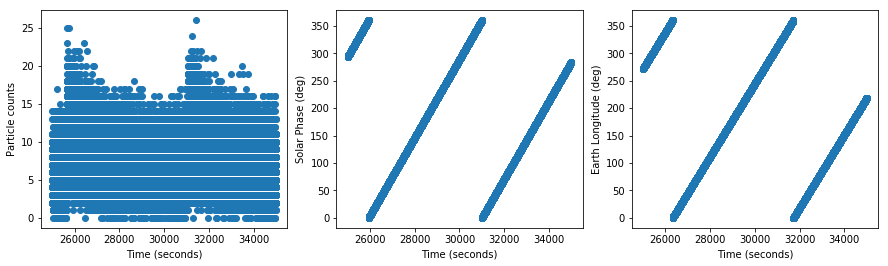

In [482]:
start = 250000; total_points = 100000

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
test_points = data_table[start-1:start-1+total_points]
ax1.scatter(test_points['seconds'], test_points['particle_counts'])
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel("Particle counts")

ax2.scatter(test_points['seconds'], test_points['solar_phase(deg)'])
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel("Solar Phase (deg)")

ax3.scatter(test_points['seconds'], test_points['earth_long(deg)'])
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel("Earth Longitude (deg)")

Text(0,0.5,'Earth Longitude (deg)')

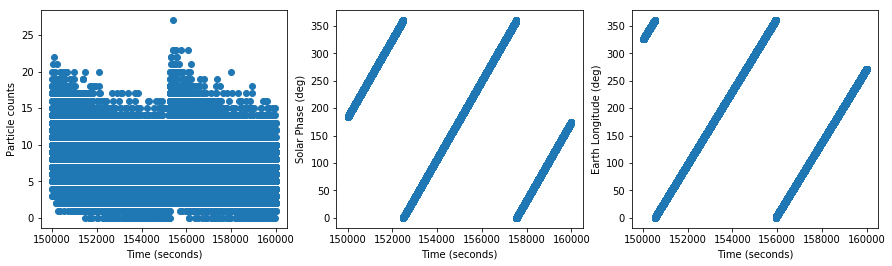

In [483]:
start = 1500000; total_points = 100000

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
test_points = data_table[start-1:start-1+total_points]
ax1.scatter(test_points['seconds'], test_points['particle_counts'])
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel("Particle counts")

ax2.scatter(test_points['seconds'], test_points['solar_phase(deg)'])
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel("Solar Phase (deg)")

ax3.scatter(test_points['seconds'], test_points['earth_long(deg)'])
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel("Earth Longitude (deg)")

Here I am just taking the same number of points that proceed different positions within the data. It shows that there is a sinsuoidal connection that is fairly consistent among different points of the data

Text(0,0.5,'Earth Longitude (deg)')

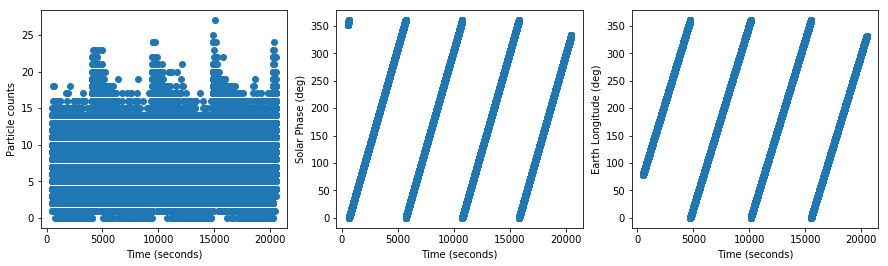

In [484]:
start = 5000; total_points = 200000

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
test_points = data_table[start-1:start-1+total_points]
ax1.scatter(test_points['seconds'], test_points['particle_counts'])
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel("Particle counts")

ax2.scatter(test_points['seconds'], test_points['solar_phase(deg)'])
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel("Solar Phase (deg)")

ax3.scatter(test_points['seconds'], test_points['earth_long(deg)'])
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel("Earth Longitude (deg)")

Text(0,0.5,'Earth Longitude (deg)')

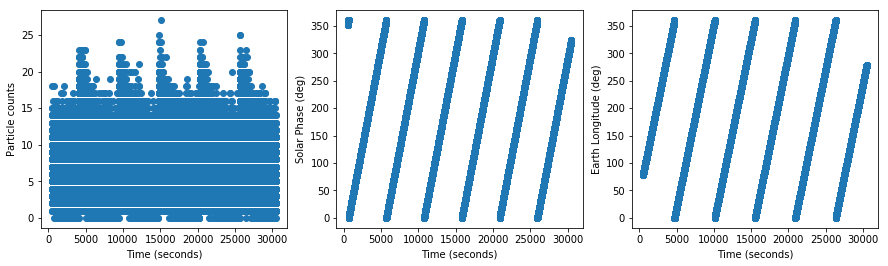

In [485]:
start = 5000; total_points = 300000

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
test_points = data_table[start-1:start-1+total_points]
ax1.scatter(test_points['seconds'], test_points['particle_counts'])
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel("Particle counts")

ax2.scatter(test_points['seconds'], test_points['solar_phase(deg)'])
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel("Solar Phase (deg)")

ax3.scatter(test_points['seconds'], test_points['earth_long(deg)'])
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel("Earth Longitude (deg)")

Text(0,0.5,'Earth Longitude (deg)')

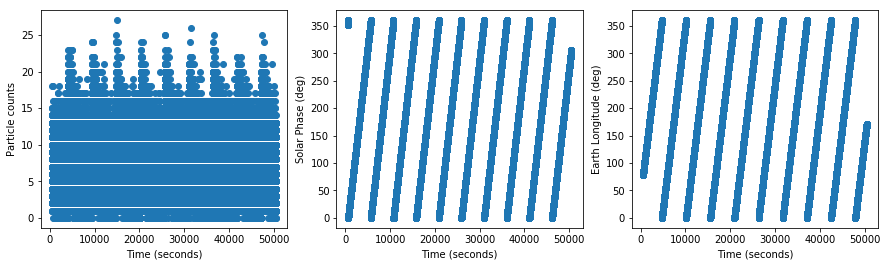

In [486]:
start = 5000; total_points = 500000

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
test_points = data_table[start-1:start-1+total_points]
ax1.scatter(test_points['seconds'], test_points['particle_counts'])
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel("Particle counts")

ax2.scatter(test_points['seconds'], test_points['solar_phase(deg)'])
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel("Solar Phase (deg)")

ax3.scatter(test_points['seconds'], test_points['earth_long(deg)'])
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel("Earth Longitude (deg)")

I decided to see if the sinusoidal part still held true at the from part of the data and vary the amount of points I proceeded to take afterwards and plot. It holds consistent that the front portion of the data has the same sinusoidal pattern. 

Text(0,0.5,'Earth Longitude (deg)')

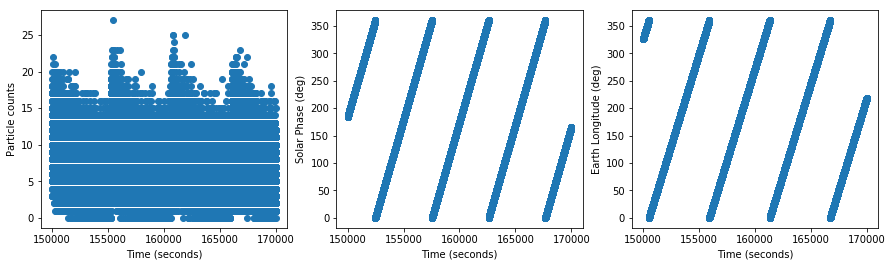

In [487]:
start = 1500000; total_points = 200000

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
test_points = data_table[start-1:start-1+total_points]
ax1.scatter(test_points['seconds'], test_points['particle_counts'])
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel("Particle counts")

ax2.scatter(test_points['seconds'], test_points['solar_phase(deg)'])
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel("Solar Phase (deg)")

ax3.scatter(test_points['seconds'], test_points['earth_long(deg)'])
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel("Earth Longitude (deg)")

Text(0,0.5,'Earth Longitude (deg)')

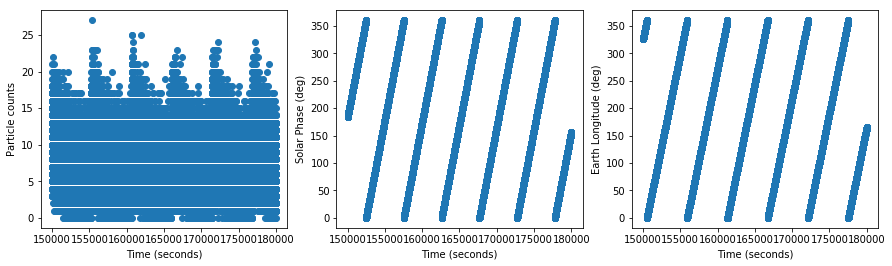

In [488]:
start = 1500000; total_points = 300000

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
test_points = data_table[start-1:start-1+total_points]
ax1.scatter(test_points['seconds'], test_points['particle_counts'])
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel("Particle counts")

ax2.scatter(test_points['seconds'], test_points['solar_phase(deg)'])
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel("Solar Phase (deg)")

ax3.scatter(test_points['seconds'], test_points['earth_long(deg)'])
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel("Earth Longitude (deg)")

Text(0,0.5,'Earth Longitude (deg)')

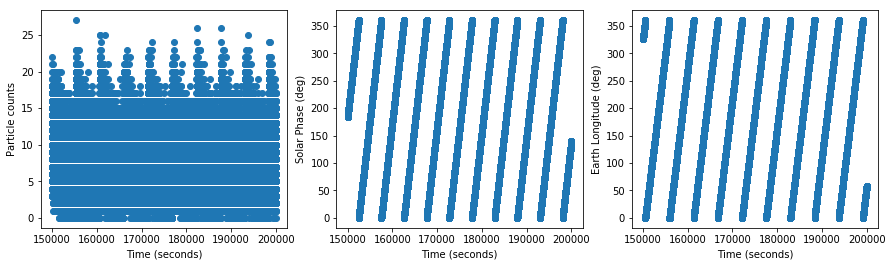

In [489]:
start = 1500000; total_points = 500000

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
test_points = data_table[start-1:start-1+total_points]
ax1.scatter(test_points['seconds'], test_points['particle_counts'])
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel("Particle counts")

ax2.scatter(test_points['seconds'], test_points['solar_phase(deg)'])
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel("Solar Phase (deg)")

ax3.scatter(test_points['seconds'], test_points['earth_long(deg)'])
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel("Earth Longitude (deg)")

I did the same thing with the back half of the data to ensure that there was nothing funky going on or there was a collection of points in the data that did not agree with the sinusoidal model being depicted.

This sinusoidal-like wave looks fairly repetitive across the whole data set. I was able to deduce that the peiod of the earth's longitude is approx 5400 seconds and the period of the solar phase was 5062 seconds.

In [518]:
# Taking every 1000th point
data_table_1000 = data_table[data_table.index % 1000 == 0]
earth_period_data = data_table_1000
earth_period_data['seconds'] = ((data_table_1000['seconds']) % 5401)
data_table_1000 = data_table[data_table.index % 1000 == 0]  
earth_period_shift = data_table_1000
earth_period_shift['seconds'] = ((data_table_1000['seconds']-4040) % 5401)

/Users/mphenicie/Enter/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/mphenicie/Enter/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Text(0,0.5,'Particle counts')

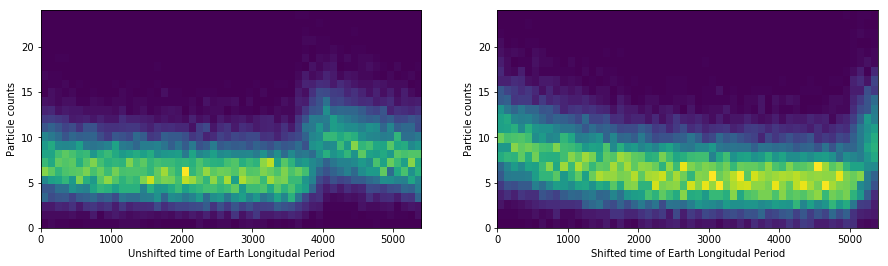

In [491]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax.hist2d(earth_period_data['seconds'], earth_period_data['particle_counts'], bins = [54, 25])
ax.set_xlabel('Unshifted time of Earth Longitudal Period')
ax.set_ylabel("Particle counts")

ax2.hist2d(earth_period_shift['seconds'], earth_period_shift['particle_counts'], bins = [54, 23])
ax2.set_xlabel('Shifted time of Earth Longitudal Period')
ax2.set_ylabel("Particle counts")

In [492]:
data_table_1000 = data_table[data_table.index % 1000 == 0]
solar_period_data = data_table_1000
solar_period_data['seconds'] = ((data_table_1000['seconds']) % 5062)

/Users/mphenicie/Enter/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Particle counts')

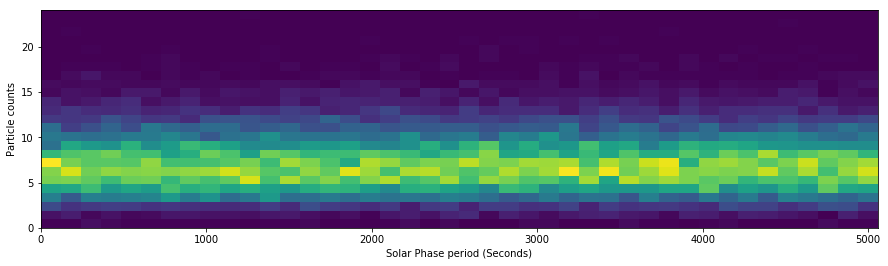

In [493]:
fig, (ax1) = plt.subplots(1, 1, figsize = (15, 4))

ax1.hist2d(solar_period_data['seconds'], solar_period_data['particle_counts'], bins = [42, 25])
ax1.set_xlabel('Solar Phase period (Seconds)')
ax1.set_ylabel("Particle counts")


There is no correlation between the solar phase and time dependency. This is just to show that there is nothing special going on here.

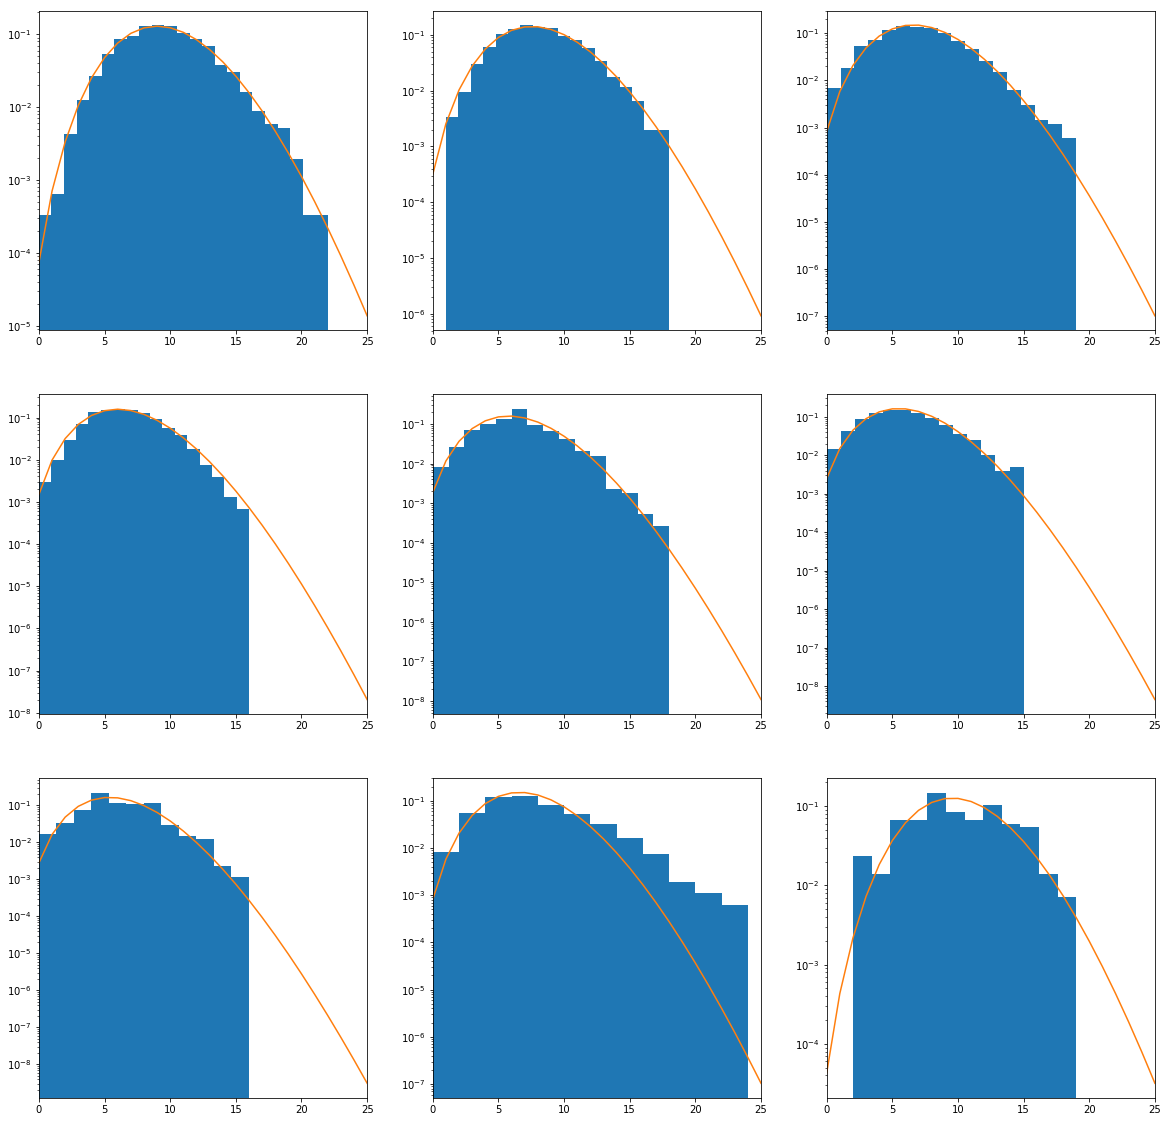

In [494]:
x = np.linspace(0,25,26)

period_1 = earth_period_shift.query(f'{667*0} < seconds < {667*1}')
period_2 = earth_period_shift.query(f'{667*1} < seconds < {667*2}')
period_3 = earth_period_shift.query(f'{667*2} < seconds < {667*3}')
period_4 = earth_period_shift.query(f'{667*3} < seconds < {667*4}')
period_5 = earth_period_shift.query(f'{667*4} < seconds < {667*5}')
period_6 = earth_period_shift.query(f'{667*5} < seconds < {667*6}')
period_7 = earth_period_shift.query(f'{667*6} < seconds < {667*7}')
period_8 = earth_period_shift.query(f'{667*7} < seconds < {667*8}')
period_9 = earth_period_shift.query(f'{667*8} < seconds < {667*9}')


fig, (axs) = plt.subplots(3, 3, figsize = (20, 20))
plt.yscale('log')
axs[0,0].hist(period_1.particle_counts, bins = 23, density=True) 
axs[0,0].set_xlim(0,25)
axs[0,0].plot(x, stats.poisson.pmf(x, period_1.particle_counts.mean()))
axs[0,0].set_yscale('log')

axs[0,1].hist(period_2.particle_counts, bins = 18, density=True) 
axs[0,1].set_xlim(0,25)
axs[0,1].plot(x, stats.poisson.pmf(x, period_2.particle_counts.mean()))
axs[0,1].set_yscale('log')

axs[0,2].hist(period_3.particle_counts, bins = 18, density=True) 
axs[0,2].set_xlim(0,25)
axs[0,2].plot(x, stats.poisson.pmf(x, period_3.particle_counts.mean()))
axs[0,2].set_yscale('log')

axs[1,0].hist(period_4.particle_counts, bins = 17, density=True) 
axs[1,0].set_xlim(0,25)
axs[1,0].plot(x, stats.poisson.pmf(x, period_4.particle_counts.mean()))
axs[1,0].set_yscale('log')

axs[1,1].hist(period_5.particle_counts, bins = 15, density=True) 
axs[1,1].set_xlim(0,25)
axs[1,1].plot(x, stats.poisson.pmf(x, period_5.particle_counts.mean()))
axs[1,1].set_yscale('log')

axs[1,2].hist(period_6.particle_counts, bins = 14, density=True) 
axs[1,2].set_xlim(0,25)
axs[1,2].plot(x, stats.poisson.pmf(x, period_6.particle_counts.mean()))
axs[1,2].set_yscale('log')

axs[2,0].hist(period_7.particle_counts, bins = 12, density=True) 
axs[2,0].set_xlim(0,25)
axs[2,0].plot(x, stats.poisson.pmf(x, period_7.particle_counts.mean()))
axs[2,0].set_yscale('log')

axs[2,1].hist(period_8.particle_counts, bins = 12, density=True) 
axs[2,1].set_xlim(0,25)
axs[2,1].plot(x, stats.poisson.pmf(x, period_8.particle_counts.mean()))
axs[2,1].set_yscale('log')

axs[2,2].hist(period_9.particle_counts, bins = 12, density=True) 
axs[2,2].set_xlim(0,25)
axs[2,2].plot(x, stats.poisson.pmf(x, period_9.particle_counts.mean()))
axs[2,2].set_yscale('log')

Here I am modeling the background, which is made by a Poisson distribution that uses average value counts. I have plotted 9 plots which divide the take in 667 second increments. These are taken relative to the earth's longitude into 9 equally sized chunks. Each 667 increment will then contain background noise which we can then compare across our data


In [495]:
def background_noise(x):
    average = np.e**(-((x-4040) % 5400)/1700)*10.1+ 5.3
    return average

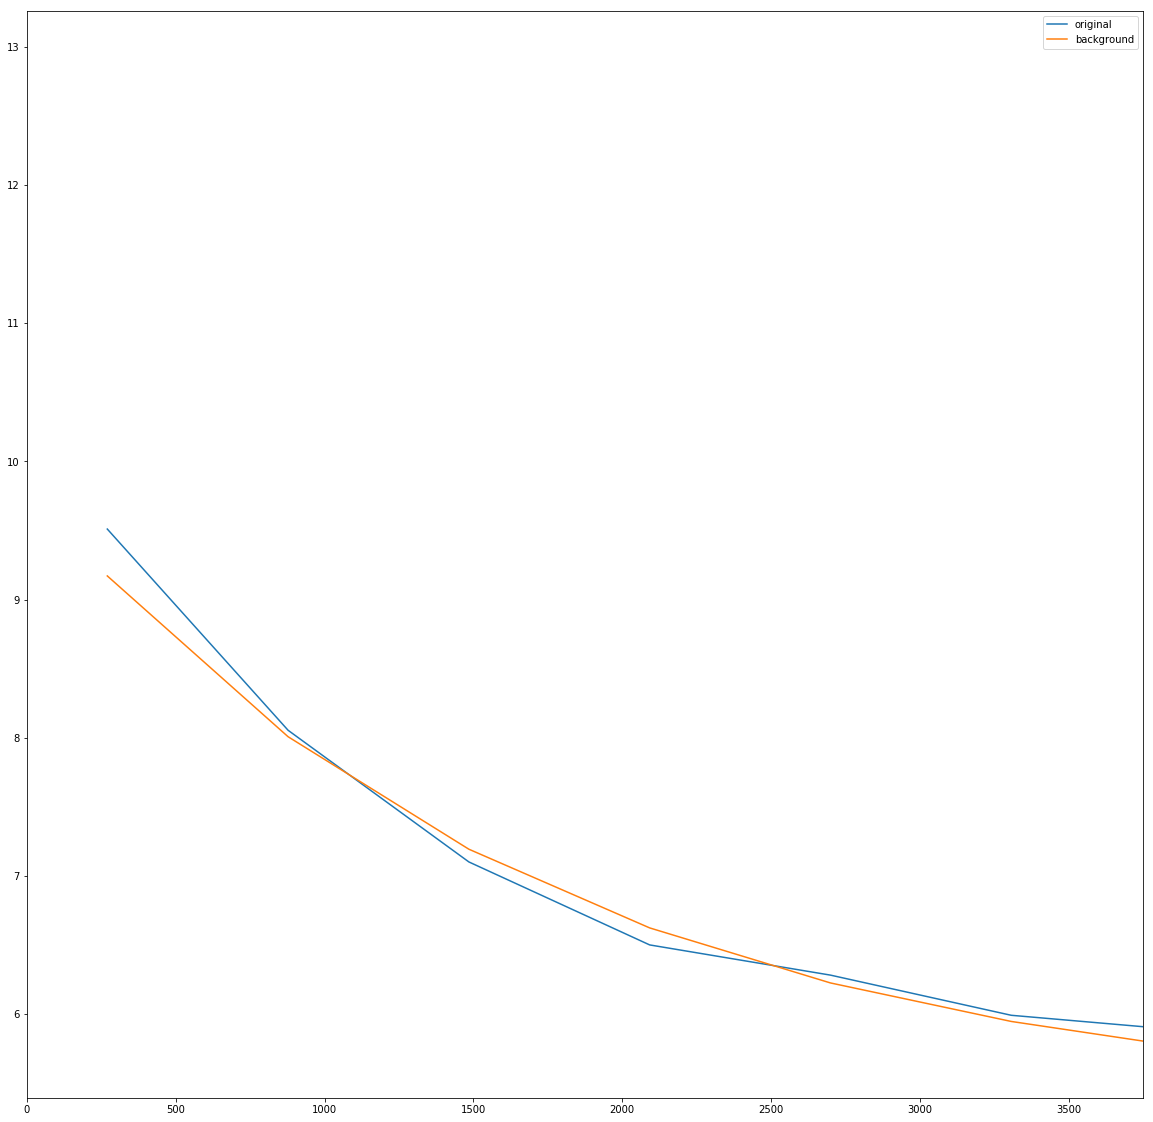

In [496]:
x = np.linspace(270, 5130, 9)
y = [period_1.particle_counts.mean(), period_2.particle_counts.mean(), period_3.particle_counts.mean(), period_4.particle_counts.mean(), period_5.particle_counts.mean(),period_6.particle_counts.mean(), period_7.particle_counts.mean(), period_8.particle_counts.mean(), period_9.particle_counts.mean()]
average = background_noise(x)
plt.plot(x,y,label ='original')
plt.plot(x, average, label='background')
plt.xlim([0,3750])
plt.legend()

I am fitting my model to what I have found based on my background noise. I do not have to accidently detect something that shouldn't be so I overfit it to the best of my abilities. This is not a perfect model, but it encompasses must of what I had found in my background distribution. 

Text(0,0.5,'Particle counts')

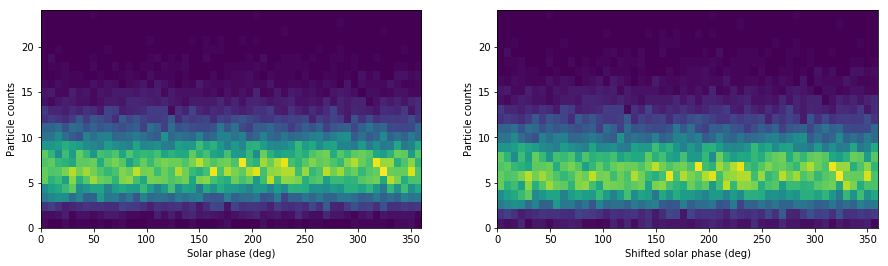

In [497]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax.hist2d(data_table_1000['solar_phase(deg)'], data_table_1000['particle_counts'], bins = [54, 25])
ax.set_xlabel("Solar phase (deg)")
ax.set_ylabel("Particle counts")

ax2.hist2d(earth_period_shift['solar_phase(deg)'], earth_period_shift['particle_counts'], bins = [54, 23])
ax2.set_xlabel("Shifted solar phase (deg)")
ax2.set_ylabel("Particle counts")

Solar phase has no attributes to effecting the number of counts within my data

Text(0,0.5,'Particle counts')

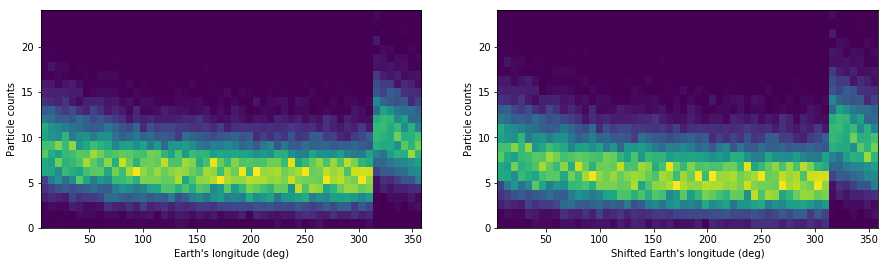

In [498]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax.hist2d(data_table_1000['earth_long(deg)'], data_table_1000['particle_counts'], bins = [54, 25])
ax.set_xlabel("Earth's longitude (deg)")
ax.set_ylabel("Particle counts")

ax2.hist2d(earth_period_shift['earth_long(deg)'], earth_period_shift['particle_counts'], bins = [54, 23])
ax2.set_xlabel("Shifted Earth's longitude (deg)")
ax2.set_ylabel("Particle counts")

Dependency of earth's longitude on particle counts

Text(0,0.5,'Particle counts')

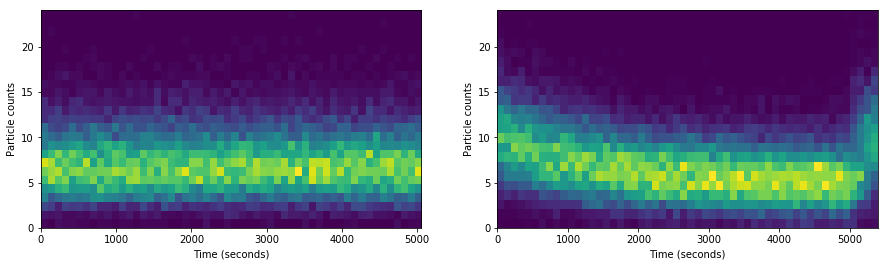

In [499]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax.hist2d(data_table_1000['seconds'], data_table_1000['particle_counts'], bins = [54, 25])
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Particle counts")

ax2.hist2d(earth_period_shift['seconds'], earth_period_shift['particle_counts'], bins = [54, 23])
ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Particle counts")

We can still take regularly spaced data points and it is still unclear that there is any time dependency at all. We can, though, take in consideration of the metadata. We understand that there is a wave-like function being produced within our data. Therefore, we can deduce that time dependence is only due to taking the regular periods of the earth's longitude and using that as our detection method. 

## Overall Analysis

There no points that really stood out to me that were not right or miscalculated. There were no points that misbehaved or were irregular over the set. I noticed, though, that the Earth Longitude and Solar Phase were periodic with different values. So I made an effort to study both those parameters on the signals collected. I wanted to see the correlation between the meta-data and the particle counts at specific time periods. That data could then be turned into a background distroubtion that will function for any time, x, during the times the set was collected between. 

Here, we see that the background changes with earth's longitude. We see that there is a time-dependence between the time and longitude which we can show by using the mod(5400) on our data. We see that this able to describe the shape of our data (to some degree with std. deviation). This works better with the phase of earth's longitude than solar phase, hence choosing to go with earth's longitude phase as my background. The background should follow a poisson-like distribution as we are measuring gamma rays which are discrete independent signals with an average. This rate follows an inverse poly function where the rate changes over the period of 5400 seconds. 

My background data follows a poisson distribution of $\lambda^k*e^{-\lambda}\over k!$ where $\lambda$ = $10.1*e^{-x-mod(5400)\over1700} + 5.7$. I will plot integrations to show thaat this should adher to the background at different times

Text(0.5,0,'Counts')

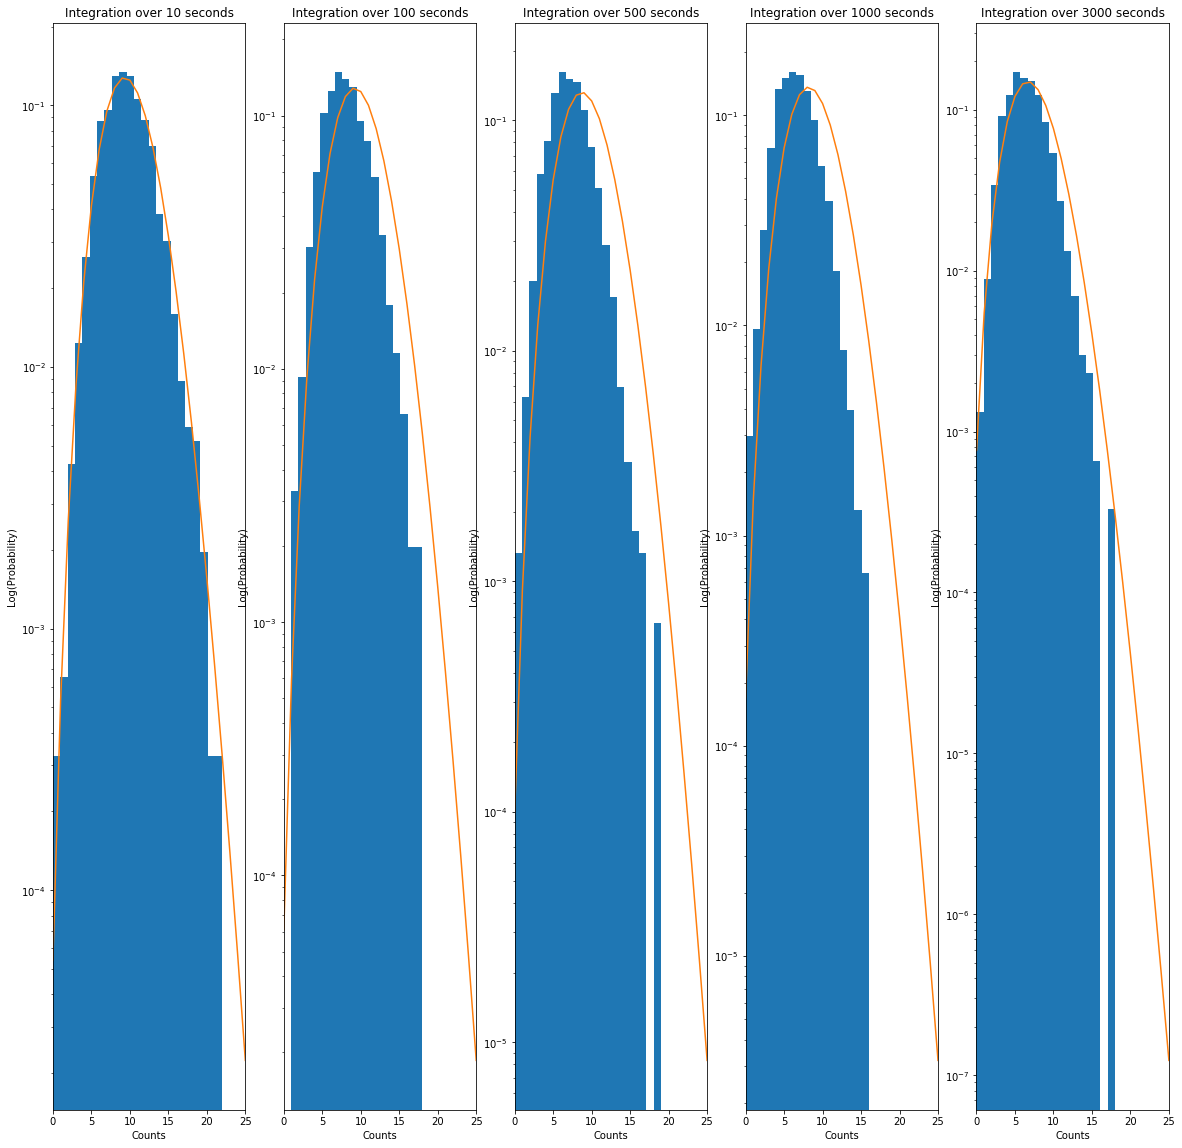

In [500]:
x = np.linspace(0,25,26)
time_1 = 1.; time_11 = 10. # 10 second difference
time_2 = 1.; time_22 = 100. # 100 second difference
time_3 = 1.; time_33 = 500. #  500 second difference
time_4 = 1.; time_44 = 1000. # 1000 second difference
time_5 = 1.; time_55 = 3000. # 3000 second difference


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 20))
plt.yscale('log')

ax1.hist(period_1.particle_counts, bins = int(max(period_1.particle_counts))+1, range=(0,max(period_1.particle_counts)), density=True); 
ax1.set_xlim(0,25); 
ax1.plot(x, stats.poisson.pmf(x, background_noise(((time_1+time_11)/2)))); 
ax1.set_yscale('log')
ax1.set_title('Integration over 10 seconds')
ax1.set_ylabel('Log(Probability)'); 
ax1.set_xlabel('Counts')

ax2.hist(period_2.particle_counts, bins = int(max(period_2.particle_counts))+1, range=(0,max(period_2.particle_counts)), density=True); 
ax2.set_xlim(0,25); 
ax2.plot(x, stats.poisson.pmf(x, background_noise(((time_2+time_22)/2)))); 
ax2.set_yscale('log')
ax2.set_title('Integration over 100 seconds')
ax2.set_ylabel('Log(Probability)'); 
ax2.set_xlabel('Counts')

ax3.hist(period_3.particle_counts, bins = int(max(period_3.particle_counts))+1, range=(0,max(period_3.particle_counts)), density=True); 
ax3.set_xlim(0,25); 
ax3.plot(x, stats.poisson.pmf(x, background_noise(((time_3+time_33)/2)))); 
ax3.set_yscale('log')
ax3.set_title('Integration over 500 seconds')
ax3.set_ylabel('Log(Probability)'); 
ax3.set_xlabel('Counts')

ax4.hist(period_4.particle_counts, bins = int(max(period_4.particle_counts))+1, range=(0,max(period_4.particle_counts)), density=True); 
ax4.set_xlim(0,25); 
ax4.plot(x, stats.poisson.pmf(x, background_noise(((time_4+time_44)/2)))); 
ax4.set_yscale('log')
ax4.set_title('Integration over 1000 seconds')
ax4.set_ylabel('Log(Probability)'); 
ax4.set_xlabel('Counts')

ax5.hist(period_5.particle_counts, bins = int(max(period_5.particle_counts))+1, range=(0,max(period_5.particle_counts)), density=True); 
ax5.set_xlim(0,25); 
ax5.plot(x, stats.poisson.pmf(x, background_noise(((time_5+time_55)/2)))); 
ax5.set_yscale('log')
ax5.set_title('Integration over 3000 seconds')
ax5.set_ylabel('Log(Probability)'); 
ax5.set_xlabel('Counts')

Ten second interval seems to fit well to the data at hand, but that is not enough data to show a good background estimate. A 3000 second interval would provide to be too much time to be able to create a resonable estimated background distribution. I decided that the distribution looks better when it is closer to zero, but we still need to include more points. I will continue to use this method but within the span on 50 second intervales. You do not want to have your times surround a discountious portion of the distribution.

Text(0.5,0,'Counts')

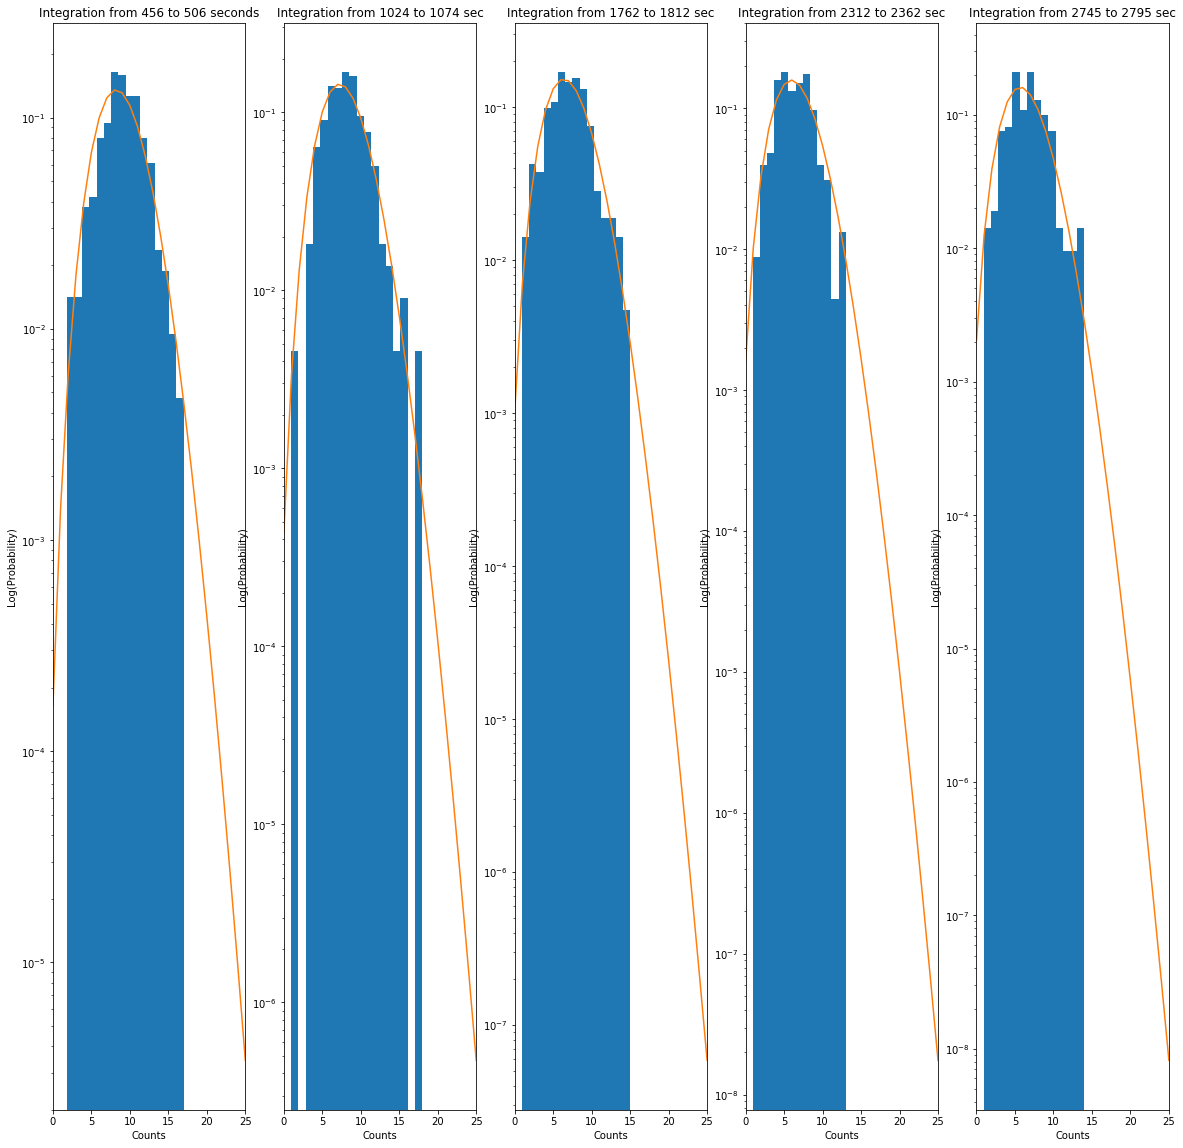

In [501]:
x = np.linspace(0,25,26)
time_1 = 456.; time_11 = 506. # 50 second difference
time_2 = 1024.; time_22 = 1074. # 50 second difference
time_3 = 1762.; time_33 = 1812. #  50 second difference
time_4 = 2312.; time_44 = 2362. # 50 second difference
time_5 = 2745.; time_55 = 2795. # 50 second difference

period_1 = earth_period_shift.query(f'{time_1} < seconds < {time_11}')
period_2 = earth_period_shift.query(f'{time_2} < seconds < {time_22}')
period_3 = earth_period_shift.query(f'{time_3} < seconds < {time_33}')
period_4 = earth_period_shift.query(f'{time_4} < seconds < {time_44}')
period_5 = earth_period_shift.query(f'{time_5} < seconds < {time_55}')

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 20))
plt.yscale('log')

ax1.hist(period_1.particle_counts, bins = int(max(period_1.particle_counts))+1, range=(0,max(period_1.particle_counts)), density=True); 
ax1.set_xlim(0,25); 
ax1.plot(x, stats.poisson.pmf(x, background_noise(((time_1+time_11)/2)))); 
ax1.set_yscale('log')
ax1.set_title('Integration from 456 to 506 seconds')
ax1.set_ylabel('Log(Probability)'); 
ax1.set_xlabel('Counts')

ax2.hist(period_2.particle_counts, bins = int(max(period_2.particle_counts))+1, range=(0,max(period_2.particle_counts)), density=True); 
ax2.set_xlim(0,25); 
ax2.plot(x, stats.poisson.pmf(x, background_noise(((time_2+time_22)/2)))); 
ax2.set_yscale('log')
ax2.set_title('Integration from 1024 to 1074 sec')
ax2.set_ylabel('Log(Probability)'); 
ax2.set_xlabel('Counts')

ax3.hist(period_3.particle_counts, bins = int(max(period_3.particle_counts))+1, range=(0,max(period_3.particle_counts)), density=True); 
ax3.set_xlim(0,25); 
ax3.plot(x, stats.poisson.pmf(x, background_noise(((time_3+time_33)/2)))); 
ax3.set_yscale('log')
ax3.set_title('Integration from 1762 to 1812 sec')
ax3.set_ylabel('Log(Probability)'); 
ax3.set_xlabel('Counts')

ax4.hist(period_4.particle_counts, bins = int(max(period_4.particle_counts))+1, range=(0,max(period_4.particle_counts)), density=True); 
ax4.set_xlim(0,25); 
ax4.plot(x, stats.poisson.pmf(x, background_noise(((time_4+time_44)/2)))); 
ax4.set_yscale('log')
ax4.set_title('Integration from 2312 to 2362 sec')
ax4.set_ylabel('Log(Probability)'); 
ax4.set_xlabel('Counts')

ax5.hist(period_5.particle_counts, bins = int(max(period_5.particle_counts))+1, range=(0,max(period_5.particle_counts)), density=True); 
ax5.set_xlim(0,25); 
ax5.plot(x, stats.poisson.pmf(x, background_noise(((time_5+time_55)/2)))); 
ax5.set_yscale('log')
ax5.set_title('Integration from 2745 to 2795 sec')
ax5.set_ylabel('Log(Probability)'); 
ax5.set_xlabel('Counts')

The model works fairly well for this dataset. If I could establish a better average value for the poisson distro as well as really understand where the discontinuous points truely lie could help me come up with an even better model for the data at hand. 

In [502]:
prob_5_sigma = 1/3.5e6
for i in range(0,7):
    n = 10**i; 
    distro = stats.poisson.ppf(1 - prob_5_sigma, background_noise(((n+n+.1)/2)))
    print(f'The 5 sigma value at t = {n} is {distro}')

The 5 sigma value at t = 1 is 29.0
The 5 sigma value at t = 10 is 29.0
The 5 sigma value at t = 100 is 29.0
The 5 sigma value at t = 1000 is 25.0
The 5 sigma value at t = 10000 is 34.0
The 5 sigma value at t = 100000 is 22.0
The 5 sigma value at t = 1000000 is 25.0


I have found the 5-sigma values for detecting a .1 second GRB from my background distribution here. There is a mostly consistency except when t = 10000, we see that it shoots up to 34. 

Text(0.5,0,'Counts')

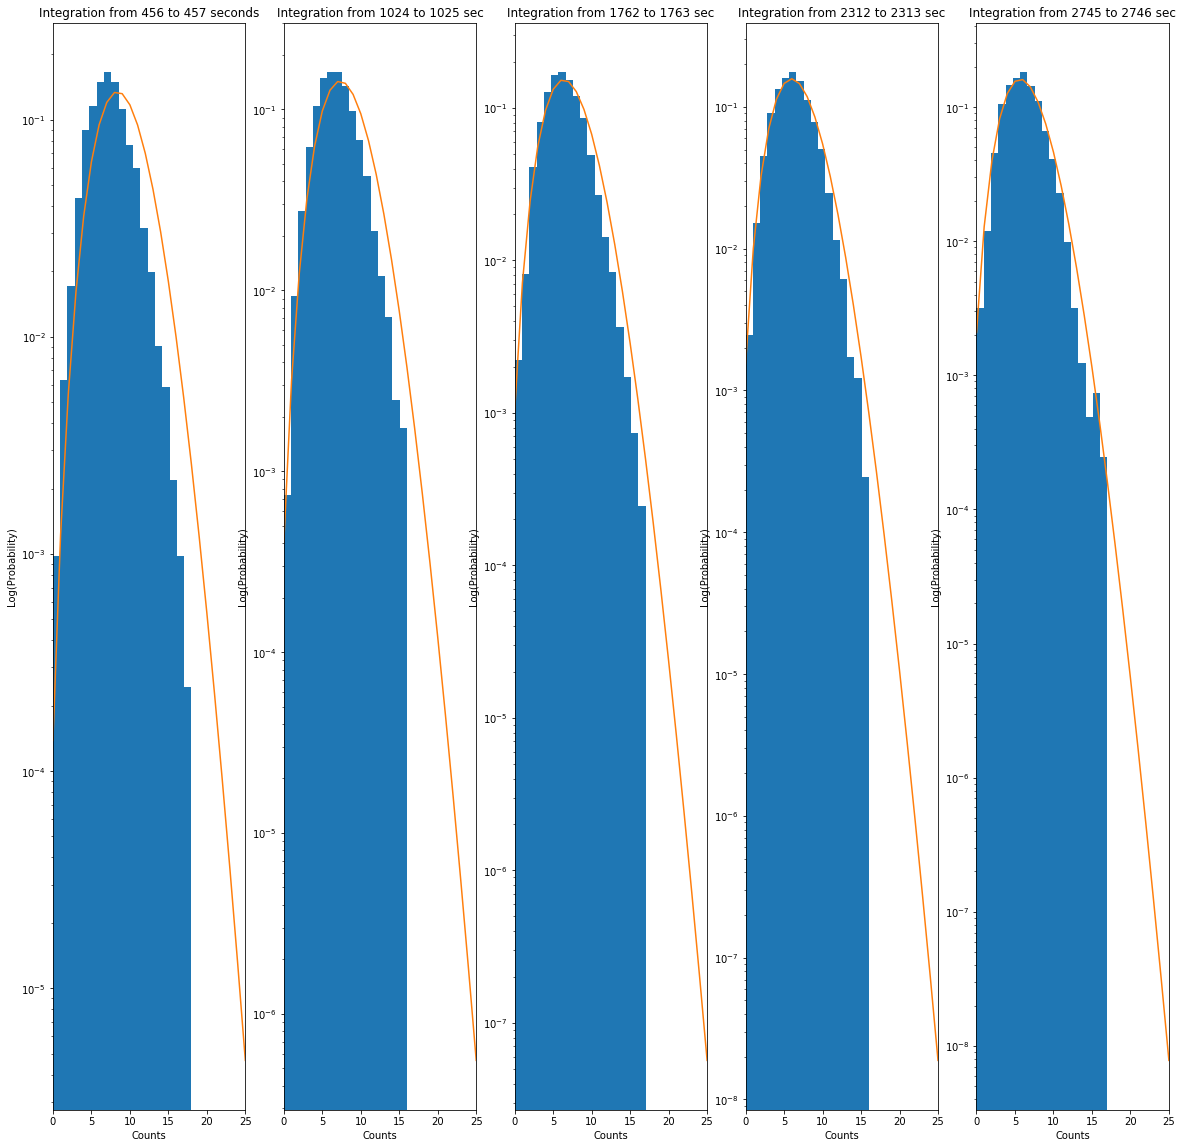

In [503]:
x = np.linspace(0,25,26)
earth_period_shift = data_table
earth_period_shift.seconds = (data_table.seconds % 5400) 
time_1 = 400.; time_11 = time_1+1. 
time_2 = 1000.; time_22 = time_2+1.
time_3 = 1800.; time_33 = time_3+1. 
time_4 = 2300.; time_44 = time_4+1. 
time_5 = 2800.; time_55 = time_5+1. 

period_1 = earth_period_shift.query(f'{time_1} < seconds < {time_11}')
period_2 = earth_period_shift.query(f'{time_2} < seconds < {time_22}')
period_3 = earth_period_shift.query(f'{time_3} < seconds < {time_33}')
period_4 = earth_period_shift.query(f'{time_4} < seconds < {time_44}')
period_5 = earth_period_shift.query(f'{time_5} < seconds < {time_55}')

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 20))
plt.yscale('log')

ax1.hist(period_1.particle_counts, bins = int(max(period_1.particle_counts))+1, range=(0,max(period_1.particle_counts)), density=True); 
ax1.set_xlim(0,25); 
ax1.plot(x, stats.poisson.pmf(x, background_noise(((time_1+time_11)/2)))); 
ax1.set_yscale('log')
ax1.set_title('Integration from 456 to 457 seconds')
ax1.set_ylabel('Log(Probability)'); 
ax1.set_xlabel('Counts')

ax2.hist(period_2.particle_counts, bins = int(max(period_2.particle_counts))+1, range=(0,max(period_2.particle_counts)), density=True); 
ax2.set_xlim(0,25); 
ax2.plot(x, stats.poisson.pmf(x, background_noise(((time_2+time_22)/2)))); 
ax2.set_yscale('log')
ax2.set_title('Integration from 1024 to 1025 sec')
ax2.set_ylabel('Log(Probability)'); 
ax2.set_xlabel('Counts')

ax3.hist(period_3.particle_counts, bins = int(max(period_3.particle_counts))+1, range=(0,max(period_3.particle_counts)), density=True); 
ax3.set_xlim(0,25); 
ax3.plot(x, stats.poisson.pmf(x, background_noise(((time_3+time_33)/2)))); 
ax3.set_yscale('log')
ax3.set_title('Integration from 1762 to 1763 sec')
ax3.set_ylabel('Log(Probability)'); 
ax3.set_xlabel('Counts')

ax4.hist(period_4.particle_counts, bins = int(max(period_4.particle_counts))+1, range=(0,max(period_4.particle_counts)), density=True); 
ax4.set_xlim(0,25); 
ax4.plot(x, stats.poisson.pmf(x, background_noise(((time_4+time_44)/2)))); 
ax4.set_yscale('log')
ax4.set_title('Integration from 2312 to 2313 sec')
ax4.set_ylabel('Log(Probability)'); 
ax4.set_xlabel('Counts')

ax5.hist(period_5.particle_counts, bins = int(max(period_5.particle_counts))+1, range=(0,max(period_5.particle_counts)), density=True); 
ax5.set_xlim(0,25); 
ax5.plot(x, stats.poisson.pmf(x, background_noise(((time_5+time_55)/2)))); 
ax5.set_yscale('log')
ax5.set_title('Integration from 2745 to 2746 sec')
ax5.set_ylabel('Log(Probability)'); 
ax5.set_xlabel('Counts')

I can now average all of earth's longitude to give a visual representation of how the distribution will look at different times for the GRB at .1 second intervals within the set. This principle would introduce a trials factor because of the number of periods searched and the properties of the poisson distribution. So, the visuals aren't competely accurate, but are good for getting an understanding of the trend that is being produced for estimating the background at different .1 second periods. This data set only contains a single value for every .1 second which is not a good model, so I decided to use the full spectrum of data to produce the model above. 

In [504]:
hf = h5py.File('images.h5', 'r')
hf.keys()
with h5py.File('images.h5', "r") as f:
    # List all groups
    for key in f.keys():
        print(key)
   

image1
imagestack


In [505]:
image_1 = np.array(hf.get('image1'))
imagestack = np.array(hf.get('imagestack'))
print(imagestack.shape)
print(image_1.shape)

(200, 200, 10)
(200, 200)


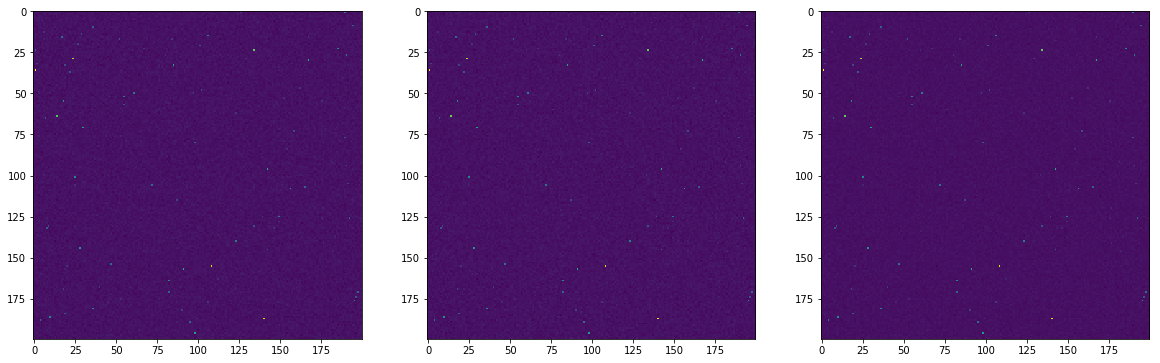

In [506]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 20))

comparison_image = image_1+imagestack[:,:,0]
ax1.imshow(image_1)
ax2.imshow(imagestack[:,:,0])
ax3.imshow(comparison_image)

Same image1 = imagestack[:,:,0]

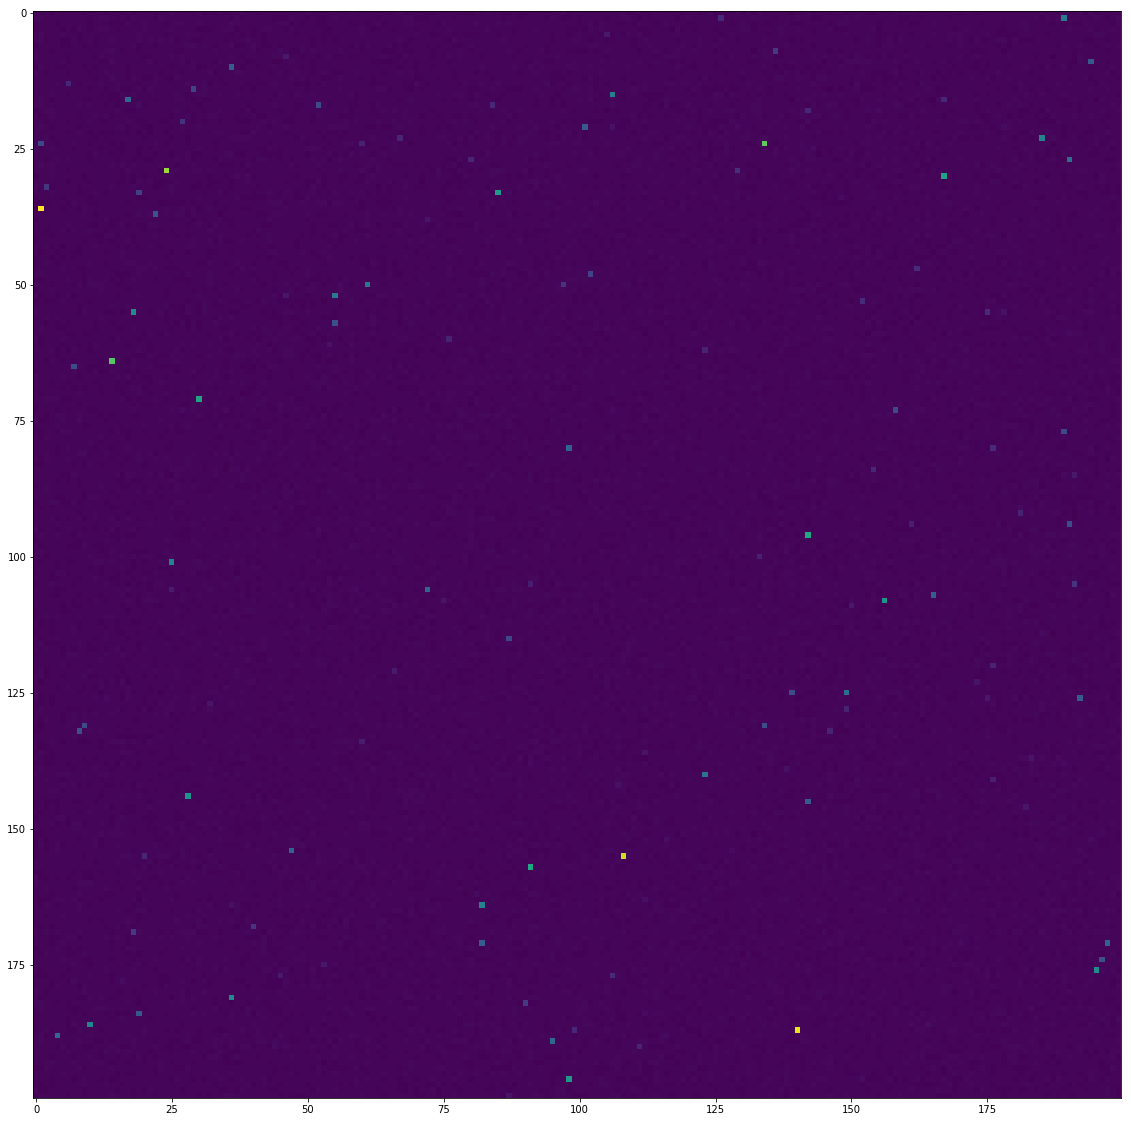

In [507]:
image1 = imagestack[:,:,0]
image2 = imagestack[:,:,1]
image3 = imagestack[:,:,2]
image4 = imagestack[:,:,3]
image5 = imagestack[:,:,4]
image6 = imagestack[:,:,5]
image7 = imagestack[:,:,6]
image8 = imagestack[:,:,7]
image9 = imagestack[:,:,8]
image10 = imagestack[:,:,9]
added_images = (image1+image2+image3+image4+image5+image6+image7+image8+image9+image10)/10
plt.imshow(added_images)

(0, 10)

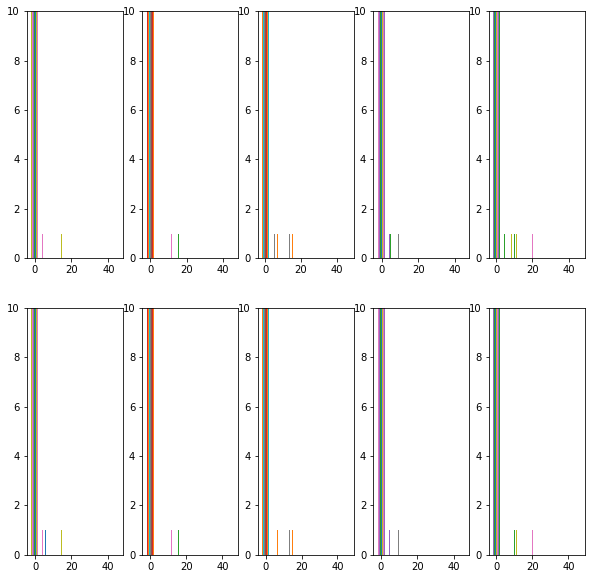

In [508]:
fig, ([ax1, ax2, ax3, ax4, ax5], [ax6, ax7, ax8, ax9, ax10])  = plt.subplots(2,5, figsize = (10,10))

ax1.hist(image1)
ax1.set_ylim(0,10)

ax2.hist(image2)
ax2.set_ylim(0,10)

ax3.hist(image3)
ax3.set_ylim(0,10)

ax4.hist(image4)
ax4.set_ylim(0,10)

ax5.hist(image5)
ax5.set_ylim(0,10)

ax6.hist(image6)
ax6.set_ylim(0,10)

ax7.hist(image7)
ax7.set_ylim(0,10)

ax8.hist(image8)
ax8.set_ylim(0,10)

ax9.hist(image9)
ax9.set_ylim(0,10)

ax10.hist(image10)
ax10.set_ylim(0,10)

(-10, 50)

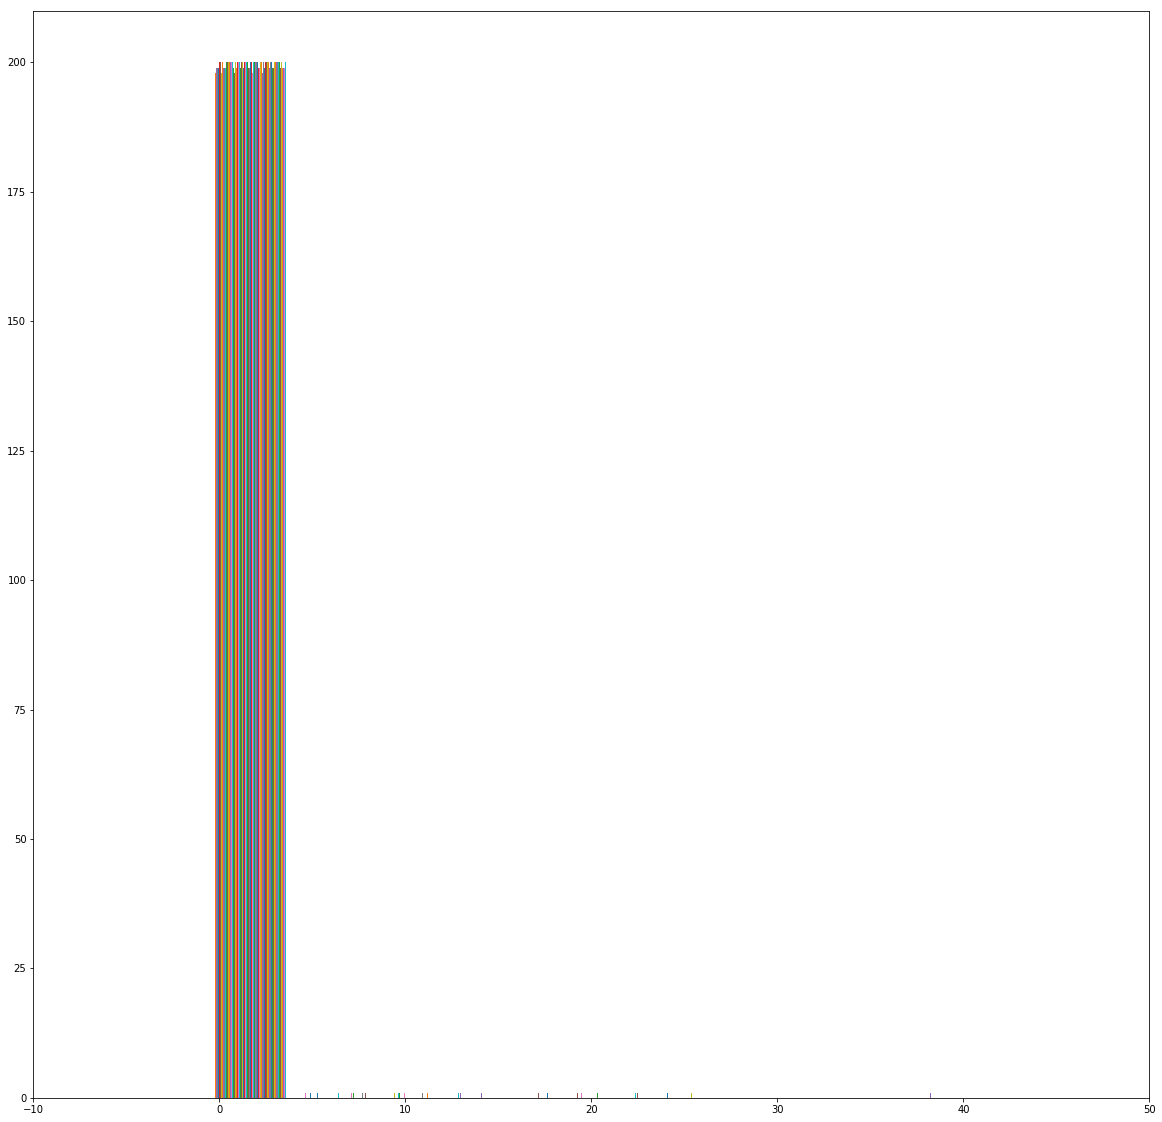

In [517]:
plt.hist(added_images)
plt.xlim([-10,50])
# This is convolved 

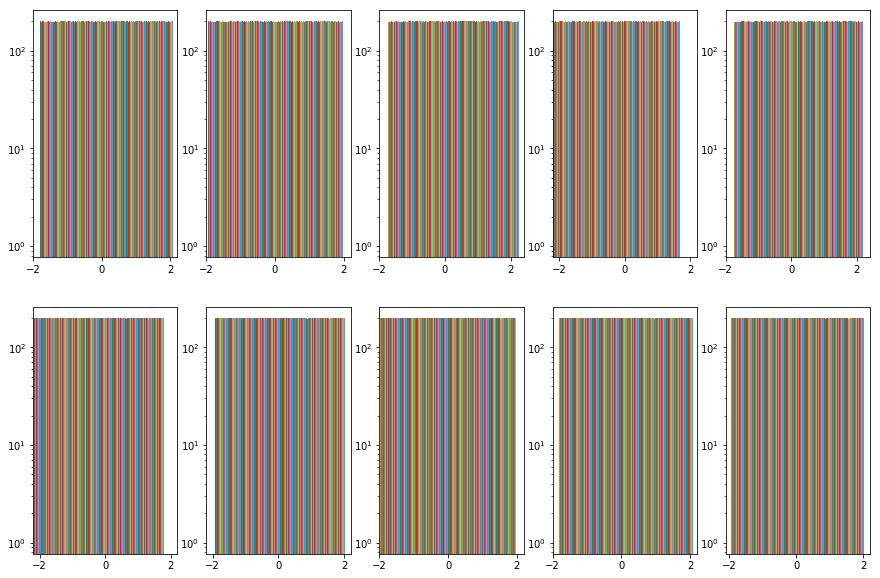

In [516]:
fig, ([ax1, ax2, ax3, ax4, ax5], [ax6, ax7, ax8, ax9, ax10])  = plt.subplots(2,5, figsize = (15,10))

ax1.hist(image1)
ax1.set_xlim([-2.,2.2])
ax1.set_yscale('log')

ax2.hist(image2)
ax2.set_xlim([-2.,2.2])
ax2.set_yscale('log')

ax3.hist(image3)
ax3.set_xlim([-2.,2.4])
ax3.set_yscale('log')

ax4.hist(image4)
ax4.set_xlim([-2.2,2.2])
ax4.set_yscale('log')

ax5.hist(image5)
ax5.set_xlim([-2.,2.4])
ax5.set_yscale('log')

ax6.hist(image6)
ax6.set_xlim([-2.2,2.2])
ax6.set_yscale('log')

ax7.hist(image7)
ax7.set_xlim([-2.2,2.2])
ax7.set_yscale('log')

ax8.hist(image8)
ax8.set_xlim([-2.,2.2])
ax8.set_yscale('log')

ax9.hist(image9)
ax9.set_xlim([-2.,2.2])
ax9.set_yscale('log')

ax10.hist(image10)
ax10.set_xlim([-2.1,2.2])
ax10.set_yscale('log')

After looking at the background data I notice that there is some time dependence in the background signal, but it appears to be random. Since I do not have any concrete evidence of a true pattern of time dependence, I will be ignorning it when modeling the background. I have found that the data is consistently spatial between pixel values of -2.2 and 2.2. My goal of action here is to assume that this is a uniform distribution between the pixels -2.2 and 2.2. Other than that, I will assume it is zero. 

My thought here is that I am getting noise from quantizing the pixels from transforming them into discrete levels. This distribution is also approx uniform, too. This can be signal independent if there are other sources of noise which are big enough to influence the data. Here, I will assume there are no other source of noise and that the distribution is time dependent. 

My whole procedure will to be to vary the background of the distribution and look for faint stars. I will need to vary the background accordingly to search for when I will be able to measure my signal and when I will not be able to measure my signal and receive just noise. When I receive just noise, I know I have 'too much background signal'. Therefore, I need to find the threshold between when I can measure a certain signal and when I am just receiving noise. I will be looking for thresholds right below that average which should yield a faint signal. This signal to noise distribution can be used to calculate a pdf value using a binomial distribution because it will include my faint signal and no noise to 'hide' the signal. 

In [48]:
hf.close()